<a href="https://colab.research.google.com/github/tanya072/Analytics-Capstone/blob/master/DataVizAss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Drawing domestic flights in Australia using NetworkX

In [2]:
# cartopy installation
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [0]:
# importing packages
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import Image
%matplotlib inline

In [0]:
# loading the dataset with coordinates of airports in Australia
routes_coordinates = pd.read_csv('/content/drive/My Drive/DataVisualization_Ass2/flight_data_csv.csv')
routes_coordinates



In [0]:
# Constructing the list of edges representing the graph, where nodes are airports, 
# and two airports are connected if there exists a route between 
# them (flight network):
edges = routes_coordinates[['from_city', 'to_city']].values
edges

In [0]:
# Creating the networkX graph from the edges array
g = nx.from_edgelist(edges)


In [0]:
# Graph statistics
len(g.nodes()), len(g.edges())

(20, 24)

There are 20 airports and 24 routes in the dataset

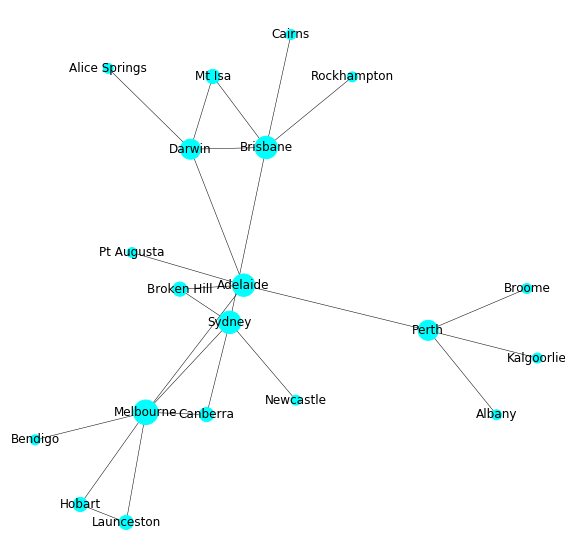

In [8]:
# The node sizes will depend on the degree of the nodes, that is, 
# the number of airports connected to every node
deg = nx.degree(g)
sizes = [100 * deg[from_city] for from_city in g.nodes]

# Plot the graph
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
nx.draw_networkx(g, ax=ax, node_size=sizes, node_color = 'aqua',
                font_size=12, alpha=1,
                width=.5)
ax.set_axis_off()

In [0]:
# List of unique airports
unique_airports = routes_coordinates.drop_duplicates('from_city')
unique_airports = unique_airports[['from_city', 'from_long', 'from_lat', 'price']]
unique_airports

                    

# Drawing domestic flights in Australia using Cartopy with Matplotlib

In [0]:
crs = ccrs.PlateCarree()

/usr/lib/python3/dist-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


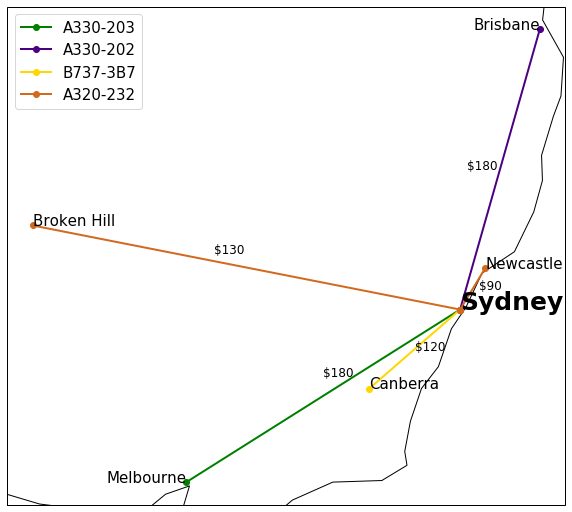

In [10]:

# Flights from Sydney
fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()

syd_lon, syd_lat = 151.21, -33.87
mel_lon, mel_lat = 144.96, -37.81
bri_lon, bri_lat = 153.03, -27.47
can_lon, can_lat = 149.13, -35.68
new_lon, new_lat = 151.78, -32.93
brk_lon, brk_lat = 141.45, -31.95


plt.plot([syd_lon, mel_lon], [syd_lat, mel_lat],
         color='green', linewidth=2, marker='o', label='A330-203')

plt.plot([syd_lon, bri_lon], [syd_lat, bri_lat],
         color='indigo', linewidth=2, marker='o', label='A330-202'),# markersize=15)

plt.plot([syd_lon, can_lon], [syd_lat, can_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')

plt.plot([syd_lon, new_lon], [syd_lat, new_lat],
         color='chocolate', linewidth=2, marker='o', label='A320-232')

plt.plot([syd_lon, brk_lon], [syd_lat, brk_lat],
         color='chocolate', linewidth=2, marker='o')        

plt.text(syd_lon, syd_lat, 'Sydney',   fontsize=25, fontweight='bold')
plt.text(mel_lon, mel_lat, 'Melbourne',horizontalalignment='right', fontsize=15)
plt.text(bri_lon, bri_lat, 'Brisbane', horizontalalignment='right', fontsize=15)
plt.text(can_lon, can_lat, 'Canberra', fontsize=15)
plt.text(new_lon, new_lat, 'Newcastle',fontsize=15)
plt.text(brk_lon, brk_lat, 'Broken Hill',fontsize=15)

# Prices labels
plt.text((syd_lon+mel_lon)/2, (syd_lat+mel_lat)/2.025, '$180', fontsize=12)
plt.text((syd_lon+bri_lon)/2.01, (syd_lat+bri_lat)/2, '$180', fontsize=12)
plt.text((syd_lon+new_lon)/1.998, (syd_lat+new_lat)/2, '$90', fontsize=12)
plt.text((syd_lon+can_lon)/1.9999, (syd_lat+can_lat)/1.999, '$120', fontsize=12)
plt.text((syd_lon+brk_lon)/2.01, (syd_lat+brk_lat)/2.02, '$130', fontsize=12)

plt.legend(fontsize=15)
plt.show()

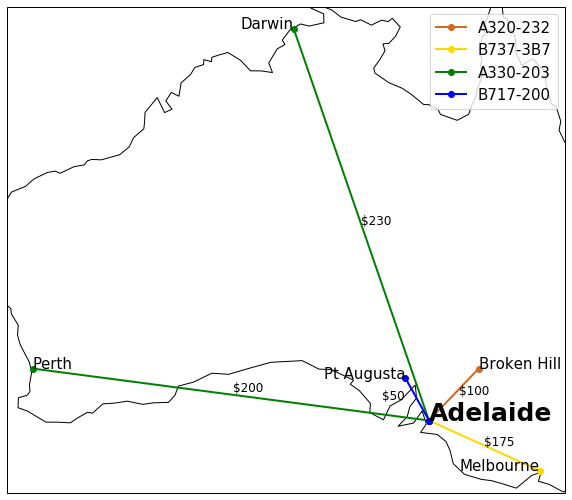

In [0]:
# Flights from Adelaide

fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()


mel_lon, mel_lat = 144.96, -37.81
brk_lon, brk_lat = 141.45, -31.95
ade_lon, ade_lat = 138.60, -34.93
per_lon, per_lat = 115.86, -31.95
dar_lon, dar_lat = 130.84, -12.46
pag_lon, pag_lat = 137.25, -32.50


plt.plot([ade_lon, brk_lon], [ade_lat, brk_lat],
         color='chocolate', linewidth=2, marker='o',label='A320-232')
plt.plot([ade_lon, mel_lon], [ade_lat, mel_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')
plt.plot([ade_lon, per_lon], [ade_lat, per_lat],
         color='green', linewidth=2, marker='o', label='A330-203')
plt.plot([ade_lon, dar_lon], [ade_lat, dar_lat],
         color='green', linewidth=2, marker='o')
plt.plot([ade_lon, pag_lon], [ade_lat, pag_lat],
         color='blue', linewidth=2, marker='o', label='B717-200')

plt.text(mel_lon, mel_lat, 'Melbourne',fontsize=15, horizontalalignment='right')
plt.text(brk_lon, brk_lat, 'Broken Hill',fontsize=15)
plt.text(ade_lon, ade_lat, 'Adelaide',fontsize=25, fontweight='bold')
plt.text(per_lon, per_lat, 'Perth',fontsize=15)
plt.text(dar_lon, dar_lat, 'Darwin',horizontalalignment='right', fontsize=15)
plt.text(pag_lon, pag_lat, 'Pt Augusta', horizontalalignment='right',fontsize=15)

plt.text((ade_lon+mel_lon)/2, (ade_lat+mel_lat)/2, '$175', fontsize=12)
plt.text((ade_lon+brk_lon)/1.996, (ade_lat+brk_lat)/2, '$100', fontsize=12)
plt.text((ade_lon+per_lon)/1.998, (ade_lat+per_lat)/2.01, '$200', fontsize=12)
plt.text((ade_lon+dar_lon)/1.9999, (ade_lat+dar_lat)/1.999, '$230', fontsize=12)
plt.text((ade_lon+pag_lon)/2.03, (ade_lat+pag_lat)/2, '$50', fontsize=12)


#plt.show()
plt.legend(fontsize=15)

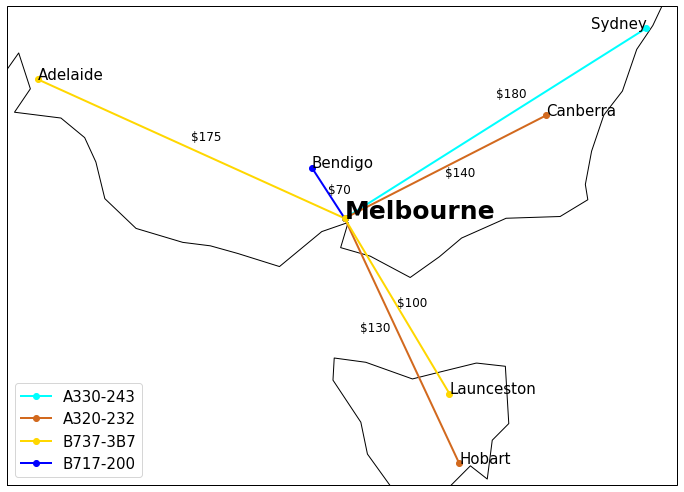

In [0]:
# Flights from Melbourne
fig, ax = plt.subplots(
    1, 1, figsize=(12, 12),
    subplot_kw=dict(projection=crs))
ax.coastlines()

syd_lon, syd_lat = 151.21, -33.87
mel_lon, mel_lat = 144.96, -37.81
can_lon, can_lat = 149.13, -35.68
ade_lon, ade_lat = 138.60, -34.93
hob_lon, hob_lat = 147.33, -42.88
ben_lon, ben_lat = 144.28, -36.76
lau_lon, lau_lat = 147.13, -41.44


plt.plot([mel_lon, syd_lon], [mel_lat, syd_lat],
         color='cyan', linewidth=2, marker='o', label='A330-243')
plt.plot([mel_lon, can_lon], [mel_lat, can_lat],
         color='chocolate', linewidth=2, marker='o', label='A320-232')
plt.plot([mel_lon, ade_lon], [mel_lat, ade_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')
plt.plot([mel_lon, hob_lon], [mel_lat, hob_lat],
         color='chocolate', linewidth=2, marker='o')
plt.plot([mel_lon, ben_lon], [mel_lat, ben_lat],
         color='blue', linewidth=2, marker='o', label='B717-200')
plt.plot([mel_lon, lau_lon], [mel_lat, lau_lat],
         color='gold', linewidth=2, marker='o')

plt.text(mel_lon, mel_lat, 'Melbourne',fontsize=25, fontweight='bold')
plt.text(syd_lon, syd_lat, 'Sydney', fontsize=15, horizontalalignment='right')
plt.text(ade_lon, ade_lat, 'Adelaide',fontsize=15)
plt.text(can_lon, can_lat, 'Canberra',fontsize=15)
plt.text(hob_lon, hob_lat, 'Hobart',fontsize=15)
plt.text(ben_lon, ben_lat, 'Bendigo',fontsize=15)
plt.text(lau_lon, lau_lat, 'Launceston',fontsize=15)

plt.text((mel_lon+syd_lon)/2, (mel_lat+syd_lat)/2.03, '$180', fontsize=12)
plt.text((mel_lon+can_lon)/2, (mel_lat+can_lat)/1.99, '$140', fontsize=12)
plt.text((mel_lon+ade_lon)/2, (mel_lat+ade_lat)/2.01, '$175', fontsize=12)
plt.text((mel_lon+ben_lon)/2, (mel_lat+ben_lat)/2.00, '$70', fontsize=12)
plt.text((mel_lon+hob_lon)/2.012, (mel_lat+hob_lat)/2.01, '$130', fontsize=12)
plt.text((mel_lon+lau_lon)/2, (mel_lat+lau_lat)/2.00, '$100', fontsize=12)

#plt.show()
plt.legend(fontsize=15)

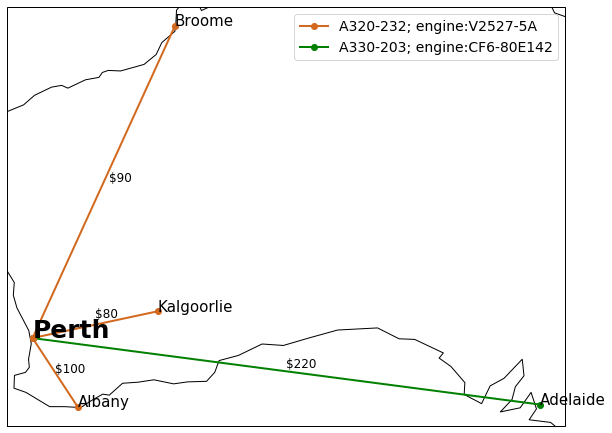

In [11]:
# Flights from Perth
fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()

alb_lon, alb_lat = 117.88, -35.03
per_lon, per_lat = 115.86, -31.95
ade_lon, ade_lat = 138.60, -34.93
bro_lon, bro_lat = 122.24, -17.96
kal_lon, kal_lat = 121.47, -30.75

plt.plot([per_lon, alb_lon], [per_lat, alb_lat],
         color='chocolate', linewidth=2, marker='o', label='A320-232; engine:V2527-5A')
plt.plot([per_lon, ade_lon], [per_lat, ade_lat],
         color='green', linewidth=2, marker='o', label='A330-203; engine:CF6-80E142')
plt.plot([per_lon, kal_lon], [per_lat, kal_lat],
         color='chocolate', linewidth=2, marker='o')
plt.plot([per_lon, bro_lon], [per_lat, bro_lat],
         color='chocolate', linewidth=2, marker='o')
plt.text(per_lon, per_lat, 'Perth',fontsize=25, fontweight='bold')
plt.text(alb_lon, alb_lat, 'Albany',fontsize=15)
plt.text(kal_lon, kal_lat, 'Kalgoorlie',fontsize=15)
plt.text(bro_lon, bro_lat, 'Broome',fontsize=15)
plt.text(ade_lon, ade_lat, 'Adelaide',fontsize=15)

plt.text((per_lon+alb_lon)/2, (per_lat+alb_lat)/2.00, '$100', fontsize=12)
plt.text((per_lon+ade_lon)/2, (per_lat+ade_lat)/2.01, '$220', fontsize=12)
plt.text((per_lon+kal_lon)/2, (per_lat+kal_lat)/2.02, '$80', fontsize=12)
plt.text((per_lon+bro_lon)/1.996, (per_lat+bro_lat)/2.00, '$90', fontsize=12)

#plt.show()
plt.legend(fontsize=14)

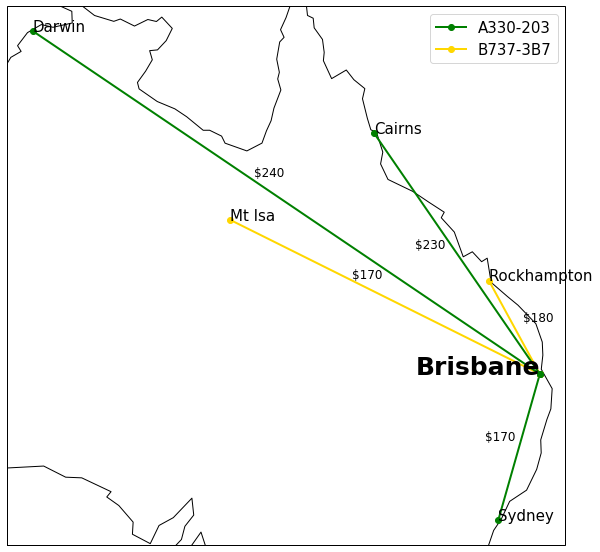

In [15]:
# Flights from Brisbane
fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()

syd_lon, syd_lat = 151.21, -33.87
bri_lon, bri_lat = 153.03, -27.47
crn_lon, crn_lat = 145.77, -16.92
dar_lon, dar_lat = 130.84, -12.46
rhm_lon, rhm_lat = 150.80, -23.38
mti_lon, mti_lat = 139.49, -20.73

plt.plot([bri_lon, syd_lon], [bri_lat, syd_lat],
         color='green', linewidth=2, marker='o', label='A330-203')
plt.plot([bri_lon, mti_lon], [bri_lat, mti_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')
plt.plot([bri_lon, rhm_lon], [bri_lat, rhm_lat],
         color='gold', linewidth=2, marker='o')
plt.plot([bri_lon, crn_lon], [bri_lat, crn_lat],
         color='green', linewidth=2, marker='o')
plt.plot([bri_lon, dar_lon], [bri_lat, dar_lat],
         color='green', linewidth=2, marker='o')


plt.text(syd_lon, syd_lat, 'Sydney',fontsize=15)
plt.text(bri_lon, bri_lat, 'Brisbane',fontsize=25, fontweight='bold', horizontalalignment='right')
plt.text(crn_lon, crn_lat, 'Cairns',fontsize=15)
plt.text(dar_lon, dar_lat, 'Darwin',fontsize=15)
plt.text(rhm_lon, rhm_lat, 'Rockhampton',fontsize=15)
plt.text(mti_lon, mti_lat, 'Mt Isa',fontsize=15)


plt.text((bri_lon+syd_lon)/2.02, (bri_lat+syd_lat)/2.02, '$170', fontsize=12)
plt.text((bri_lon+mti_lon)/2.02, (bri_lat+mti_lat)/2.07, '$170', fontsize=12)
plt.text((bri_lon+dar_lon)/2.02, (bri_lat+dar_lat)/2.12, '$240', fontsize=12)
plt.text((bri_lon+crn_lon)/2.025, (bri_lat+crn_lat)/2.02, '$230', fontsize=12)
plt.text((bri_lon+rhm_lon)/1.995, (bri_lat+rhm_lat)/2.02, '$180', fontsize=12)

#plt.show()
plt.legend(fontsize=15)

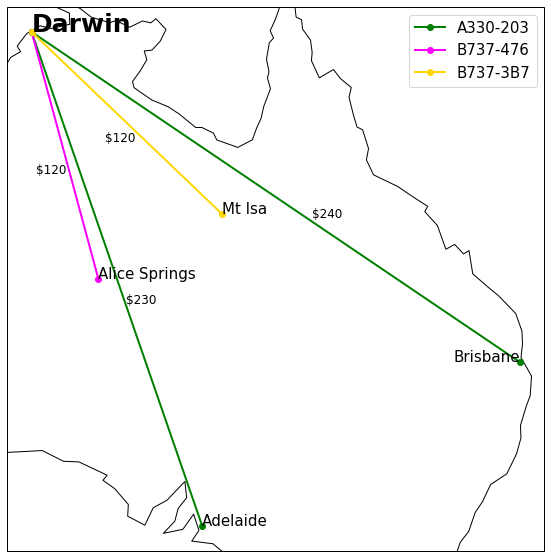

In [43]:
# Flights from Darwin

fig, ax = plt.subplots(
    1, 1, figsize=(10, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()


bri_lon, bri_lat = 153.03, -27.47
ade_lon, ade_lat = 138.60, -34.93
dar_lon, dar_lat = 130.84, -12.46
alc_lon, alc_lat = 133.88, -23.70
mti_lon, mti_lat = 139.49, -20.73

plt.plot([dar_lon, ade_lon], [dar_lat, ade_lat],
         color='green', linewidth=2, marker='o', label='A330-203')
plt.plot([dar_lon, alc_lon], [dar_lat, alc_lat],
         color='magenta', linewidth=2, marker='o', label='B737-476')
plt.plot([dar_lon, bri_lon], [dar_lat, bri_lat],
         color='green', linewidth=2, marker='o')
plt.plot([dar_lon, mti_lon], [dar_lat, mti_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')

plt.text(dar_lon, dar_lat, 'Darwin',fontsize=25, fontweight='bold')
plt.text(ade_lon, ade_lat, 'Adelaide',fontsize=15)
plt.text(alc_lon, alc_lat, 'Alice Springs',fontsize=15)
plt.text(bri_lon, bri_lat, 'Brisbane',fontsize=15, horizontalalignment='right')
plt.text(mti_lon, mti_lat, 'Mt Isa',fontsize=15)

plt.text((dar_lon+ade_lon)/1.994, (dar_lat+ade_lat)/1.91, '$230', fontsize=12)
plt.text((dar_lon+alc_lon)/2.02, (dar_lat+alc_lat)/1.91, '$120', fontsize=12)
plt.text((dar_lon+bri_lon)/1.977, (dar_lat+bri_lat)/1.91, '$240', fontsize=12)
plt.text((dar_lon+mti_lon)/2.015, (dar_lat+mti_lat)/1.9, '$120', fontsize=12)

#plt.show
plt.legend(fontsize=15)

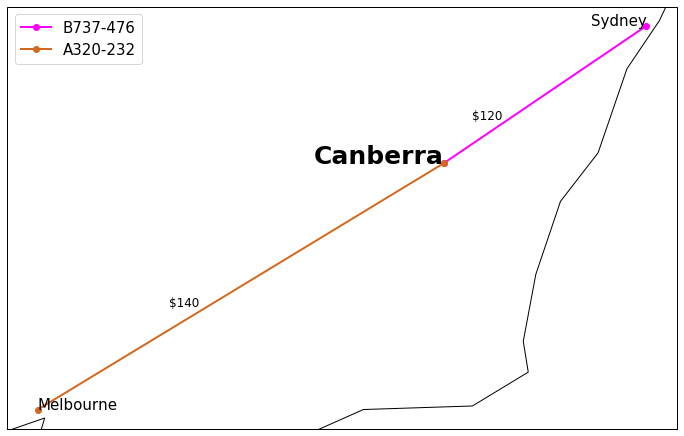

In [58]:
# Flights from Canberra
fig, ax = plt.subplots(
    1, 1, figsize=(12, 12),
    subplot_kw=dict(projection=crs))
ax.coastlines()
syd_lon, syd_lat = 151.21, -33.87
mel_lon, mel_lat = 144.96, -37.81
can_lon, can_lat = 149.13, -35.28

plt.plot([can_lon, syd_lon], [can_lat, syd_lat],
         color='magenta', linewidth=2, marker='o', label='B737-476')
plt.plot([can_lon, mel_lon], [can_lat, mel_lat],
         color='chocolate', linewidth=2, marker='o',label='A320-232')

plt.text(can_lon, can_lat, 'Canberra',fontsize=25, fontweight='bold', horizontalalignment='right')
plt.text(syd_lon, syd_lat, 'Sydney',fontsize=15, horizontalalignment='right')
plt.text(mel_lon, mel_lat, 'Melbourne',fontsize=15)

plt.text((can_lon+syd_lon)/2.01, (can_lat+syd_lat)/1.985, '$120', fontsize=12)
plt.text((can_lon+mel_lon)/2.01, (can_lat+mel_lat)/1.989, '$140', fontsize=12)


#plt.show()
plt.legend(fontsize=15)


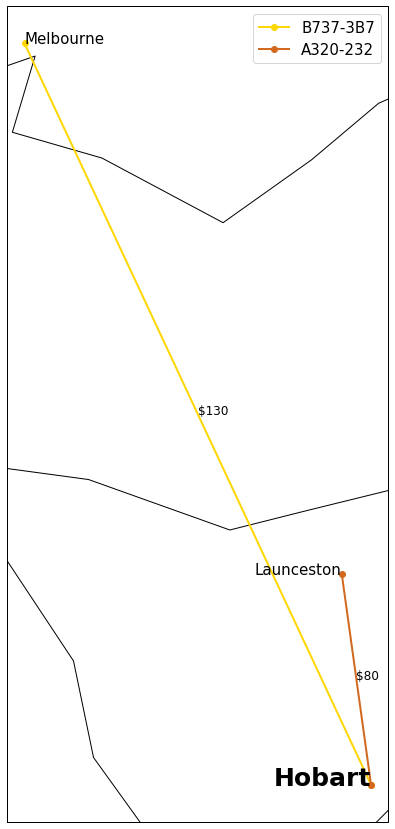

In [59]:
# Flights from Hobart

fig, ax = plt.subplots(
    1, 1, figsize=(15, 15),
    subplot_kw=dict(projection=crs))
ax.coastlines()

hob_lon, hob_lat = 147.33, -42.88
lau_lon, lau_lat = 147.13, -41.44
mel_lon, mel_lat = 144.96, -37.81

plt.plot([hob_lon, mel_lon], [hob_lat, mel_lat],
         color='gold', linewidth=2, marker='o', label='B737-3B7')
plt.plot([hob_lon, lau_lon], [hob_lat, lau_lat],
         color='chocolate', linewidth=2, marker='o', label='A320-232')

plt.text(mel_lon, mel_lat, 'Melbourne',fontsize=15)
plt.text(hob_lon, hob_lat, 'Hobart',fontsize=25, fontweight='bold', horizontalalignment='right')
plt.text(lau_lon, lau_lat, 'Launceston',fontsize=15, horizontalalignment='right')

plt.text((hob_lon+mel_lon)/2, (hob_lat+mel_lat)/2, '$130', fontsize=12)
plt.text((hob_lon+lau_lon)/2, (hob_lat+lau_lat)/2, '$80', fontsize=12)

#plt.show()
plt.legend(fontsize=15) 

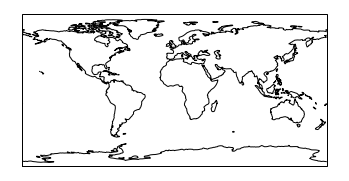

In [0]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plt.show()